In [2]:
import sys
import pandas as pd

In [3]:
kickstarter_2018 = pd.read_csv('data\ks-projects-201801.csv')

In [4]:
pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

,Field name,Field description,Type
0,ID,No description provided,Numeric
1,name,No description provided,String
2,category,No description provided,String
3,main_category,No description provided,String
4,currency,No description provided,String
5,deadline,No description provided,DateTime
6,goal,Goal amount in project currency,Numeric
7,launched,No description provided,DateTime
8,pledged,Pledged amount in the project currency,Numeric
9,state,No description provided,String


In [5]:
kickstarter_2018 = pd.read_csv('data\ks-projects-201801.csv', parse_dates=['deadline', 'launched'], index_col=['ID'])

### Ejercicio 1:
Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [6]:
kickstarter_2018[kickstarter_2018.name.duplicated()].sort_values(by='name', ascending=False)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
329580179,xxx (Canceled),Art,Art,USD,2011-09-03,10000.0,2011-06-05 04:54:37,1151.00,canceled,18,US,1151.00,1151.00,10000.00
58345768,x (Canceled),Children's Books,Publishing,USD,2016-07-24,15000.0,2016-05-25 06:48:32,0.00,canceled,0,US,0.00,0.00,15000.00
983316237,x (Canceled),Fiction,Publishing,USD,2012-07-24,10000.0,2012-06-26 22:15:19,0.00,canceled,0,US,0.00,0.00,10000.00
1955983697,x (Canceled),Software,Technology,USD,2011-02-21,20000.0,2011-01-21 00:21:20,0.00,canceled,0,US,0.00,0.00,20000.00
234114061,x (Canceled),Fashion,Fashion,USD,2013-09-03,5900.0,2013-07-29 20:14:48,0.00,canceled,0,US,0.00,0.00,5900.00
774948469,x,Apps,Technology,USD,2014-12-19,1500.0,2014-11-18 04:56:32,151.00,failed,4,US,151.00,151.00,1500.00
1863478885,weSTAND: A Stand With a Mission,Gadgets,Technology,USD,2015-10-18,7000.0,2015-09-18 21:39:35,530.00,failed,19,US,530.00,530.00,7000.00
167364797,test (Canceled),Digital Art,Art,GBP,2016-03-20,360.0,2016-02-20 00:10:45,100.00,canceled,1,GB,143.03,141.30,508.68
1404511608,test (Canceled),Space Exploration,Technology,USD,2015-04-18,49000.0,2015-03-19 02:40:10,1333.00,canceled,10,US,1333.00,1333.00,49000.00


In [7]:
from hashlib import md5

In [8]:
def hashit(val):
    if isinstance(val, float):
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

### Ejercicio 2:
Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

Para verificar vamos a agregar una nueva columna 'hash_name' al dataset y guardar en ella el hash correspondiente a cada valor de 'name'. Luego vamos a contar cuantos duplicados hay para 'name' y contrastar con la cantidad de duplicados para 'hash_name'. Deberían ser iguales.

In [9]:
kickstarter_2018['hash_name'] = kickstarter_2018['name'].apply(hashit)
kickstarter_2018[kickstarter_2018.name.duplicated()].shape

(2896, 15)

In [10]:
kickstarter_2018[kickstarter_2018.hash_name.duplicated()].shape

(2896, 15)

Observamos que ambas cantidades son iguales. Con esto comprobamos que los nombres duplicados tienen el hash de nombre duplicado.

#### 1.4 Nunca modificar los datos crudos u originales

In [11]:
kickstarter_2018.to_csv('data\ks-projects-201801-for-pandas.csv')

In [12]:
kickstarter_2018 = pd.read_csv("data\ks-projects-201801-for-pandas.csv", index_col='ID', parse_dates=['deadline', 'launched'])

In [13]:
kickstarter_2018.describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hash_name
count,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05,378657
unique,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN,375764
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN,2cdff1887ad0f0d341ca3f08841de3a0
freq,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN,41
first,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,NaN,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,NaN,2018-01-02 15:02:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04,NaN
std,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03,NaN


In [14]:
import chardet
import string
string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

In [15]:
# look at the first ten thousand bytes to guess the character encoding
with open("data\ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
# check what the character encoding might be
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [16]:
# read in the file with te encoding detect by chardet
kickstarter_2016 = pd.read_csv("data\ks-projects-201612.csv", encoding = 'Windows-1252')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
kickstarter_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [18]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad


### Ejercicio 3
Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-2018.csv' con enconding iso-8859-14.

In [19]:
import re
# Método que valida si un texto contiene caracteres raros
def HasStrangeCharaters(paragraph):
    flagIs = False
    words = paragraph.split(' ')
    for word in words:
        if not re.match(r'^(\w+)$', word):
            flagIs = True
    return flagIs

kickstarter_2018 = kickstarter_2018[kickstarter_2018['name'].notnull()]
kickstarter_2018[kickstarter_2018['name'].apply(HasStrangeCharaters)].shape

(241055, 15)

In [20]:
kickstarter_2018_iso_8859 = pd.read_csv("data\ks-projects-201801.csv", encoding = 'iso-8859-14')
kickstarter_2018_iso_8859 = kickstarter_2018_iso_8859[kickstarter_2018_iso_8859['name'].notnull()]
kickstarter_2018_iso_8859[kickstarter_2018_iso_8859['name'].apply(HasStrangeCharaters)].shape

(241601, 15)

Vemos que la cantidad de nombres con caracteres raros al cargar kickstarter con encoding 
iso-8859-14 es mayor a kickstarter_2018.
- kickstarter_2018 = 241055
- kickstarter_2018_iso_8859 = 241601

#### 2.2 Tratar valores faltantes

In [21]:
# get th number of missing data points per columns
missing_values_count = kickstarter_2018.isnull().sum()
# look at the # of missing points in the firts ten columns
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [22]:
len(kickstarter_2018.dropna())/len(kickstarter_2018)

0.9899724552827492

In [23]:
len(kickstarter_2018.dropna(subset=['name'])) / len(kickstarter_2018)

1.0

In [24]:
kickstarter_2018[kickstarter_2018.name.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,


In [25]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) /\
len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

1.0

In [26]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [27]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [28]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00,317cb508c0d274aa44ea6dc7135f67e7
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53,5e380aed7fb3ac232113ad8b84f6e281
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00,db6c3338a76817fba7fa342ed6e8484f
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00,c6453b947fa89bb74055d6ac199670cb
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00,82871f83555fc30a3126ee35bc582f24
1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39,8c862d0bdb17b09b0f4648d6481a2ce3
1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00,39bc2adfb03ba4b249a05a574a9e3128
1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00,1977254adc7cd06aaf8f3af17ff2ec6f
1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00,941466bc8d50d9e1eb8364848b604483


In [29]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
count,3797,3797,3797,3797,3797,3.797000e+03,3797,3.797000e+03,3797,3797.0,3797,0.0,3.797000e+03,3.797000e+03,3797
unique,3764,28,12,10,722,NaN,3797,NaN,6,NaN,1,NaN,NaN,NaN,3764
top,New EP/Music Development,Music,Music,USD,2015-05-01 00:00:00,NaN,2015-10-27 17:00:11,NaN,undefined,NaN,"N,0""",NaN,NaN,NaN,2cdff1887ad0f0d341ca3f08841de3a0
freq,28,2387,2388,2738,26,NaN,1,NaN,3562,NaN,3797,NaN,NaN,NaN,28
first,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,NaN,2012-03-14 19:05:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,NaN,2016-05-21 20:45:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.413353e+03,NaN,3.023265e+03,NaN,0.0,NaN,NaN,2.949851e+03,5.097306e+03,NaN
std,NaN,NaN,NaN,NaN,NaN,3.746624e+04,NaN,4.491941e+04,NaN,0.0,NaN,NaN,4.488172e+04,3.725879e+04,NaN
min,NaN,NaN,NaN,NaN,NaN,1.080000e+02,NaN,0.000000e+00,NaN,0.0,NaN,NaN,0.000000e+00,8.528000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,5.000000e+00,NaN,0.0,NaN,NaN,5.000000e+00,2.250000e+03,NaN


In [30]:
kickstarter_2018[(kickstarter_2018.country == 'N,0') & ~(kickstarter_2018.usd_pledged.isnull())].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,


In [31]:
kickstarter_2018 = kickstarter_2018.fillna(0)

In [32]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [33]:
kickstarter_2018.shape

(378657, 15)

#### 2.3 Codificar variables

In [34]:
from sklearn import preprocessing

In [35]:
kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,state,country,hash_name
count,378657,378657,378657,378657,378657,378657,378657
unique,375764,159,15,14,6,23,375764
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US,2cdff1887ad0f0d341ca3f08841de3a0
freq,41,22313,63584,295362,197716,292624,41


In [36]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [37]:
# View encoder mapping 
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [38]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column])
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad


In [39]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column])
kickstarter_2018.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad


In [40]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'
lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


### Ejercicio 4
Codificar currency con ambas estrategias

In [41]:
col_currency = 'currency'
le = preprocessing.LabelEncoder()
le.fit(kickstarter_2018[col_currency])

LabelEncoder()

In [42]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [43]:
kickstarter_2018[col_currency] = le.transform(kickstarter_2018[col_currency])
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad


In [44]:
kickstarter_2018[col_currency] = le.inverse_transform(kickstarter_2018[col_currency])
kickstarter_2018.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,9c01404a2ef702811c2088ce139042ad


In [45]:
from sklearn.preprocessing import LabelBinarizer
other_currency = 'currency'
lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018[other_currency])
pd.DataFrame(lb_results, columns=((other_currency + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Ejercicio 5
1. ¿Hay proyectos exitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje si y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [46]:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged <= kickstarter_2018.goal)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name
ID,,,,,,,,,,,,,,,
1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.00,250.00,250.00,2d3d4b4267af87948bf7ac6d3ca13b54
1000120151,Feather Cast Furled Fly Fishing Leaders,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:43,2000.0,successful,18,AU,1473.62,1427.35,1427.35,3234137b4fed60e01aade5883d01d5d7
1000153208,Phil Younger - Slow Down (Official Music Video),Music,Music,USD,2016-12-20,2100.0,2016-12-09 20:27:02,2100.0,successful,34,US,83.00,2100.00,2100.00,18f5a466eb059b2d362b61207f6f12a5
1001000566,WrittenWitheArt,Publishing,Publishing,USD,2014-03-05,1500.0,2014-02-04 01:30:08,1500.0,successful,26,US,1500.00,1500.00,1500.00,c4ea4b1ab6cfa190cdee608b8cde3f79
1001077166,Student Operated Fabrication Lab,Fabrication Tools,Technology,USD,2012-07-11,5000.0,2012-06-11 13:55:42,5000.0,successful,57,US,5000.00,5000.00,5000.00,aa3950211bbe037b954cc6e54c013bca
1001878319,DANCING CLASSROOMS GRVA 2013,Dance,Dance,USD,2013-02-10,6000.0,2013-01-11 13:37:11,6000.0,successful,63,US,6000.00,6000.00,6000.00,30b0603a1f3efb304255deb70bd31169
1002421792,"""Fragile"" Stephanie Mathias' First EP!",Pop,Music,USD,2016-09-16,3000.0,2016-08-15 14:20:16,3000.0,successful,60,US,986.00,3000.00,3000.00,1f4f078299994e40b77eaba23184c6b7
1002478333,"Natural face, feet, and body scrubs",Crafts,Crafts,USD,2016-01-18,120.0,2015-12-19 01:01:55,120.0,successful,1,US,120.00,120.00,120.00,81991ccd1aebfe9045d0cbcfe20050fe
1002914380,Dos Pueblos Tecnicos,Experimental,Theater,USD,2014-09-02,500.0,2014-08-23 02:09:32,500.0,successful,6,US,500.00,500.00,500.00,5f4481771b44ec7dfe484a79e4b8cbbf


In [50]:
# Porcentaje de proyectos exitosos que no consiguieron el objetivo y los que si lo consiguieron
num_records = kickstarter_2018[kickstarter_2018.state == 'successful'].shape[0]
num_records

133956

In [51]:
proy_exit_no_obj = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged <= kickstarter_2018.goal)].shape[0]
proy_exit_no_obj

4062

In [52]:
proy_exit_si_obj = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)].shape[0]
proy_exit_si_obj

129894

In [53]:
porc_exit_si_objetivo = (proy_exit_si_obj * 100) / num_records
porc_exit_si_objetivo

96.96766102302249

In [54]:
porc_exit_no_objetivo = (proy_exit_no_obj * 100) / num_records
porc_exit_no_objetivo

3.032338976977515

In [57]:
kickstarter_2018.pivot_table(kickstarter_2018, index='state', columns='main_category')

backers                                                \
main_category        Art      Comics     Crafts      Dance      Design   
state                                                                    
canceled        7.257876   18.558195   7.023725   5.987730   42.761561   
failed          8.821656   21.420961   6.005962   9.567611   31.548603   
live           32.324742   53.210526   7.473684  11.388889  222.203279   
successful     90.358123  231.404314  94.148463  63.396065  614.783791   
suspended      11.718750    4.391304   6.625000   4.461538  232.650407   
undefined            NaN         NaN        NaN   0.000000    0.000000   

                                                                            \
main_category     Fashion Film & Video        Food       Games  Journalism   
state                                                                        
canceled        13.038113    15.549435    9.015830   65.587714    4.695985   
failed           9.864335    15.115309   12.616945   43.963692    7.814154   
live            25.700000    16.909639   29.255435   87.139373   28.161290   
successful     217.001252   152.560428  180.557929  814.384087  152.306324   
suspended       53.862319    10.264957   47.444444   32.118182    2.211538   
undefined        0.000000     0.000000         NaN    0.000000         NaN   

                  ...      usd_pledged_real                              \
main_category     ...               Fashion  Film & Video          Food   
state             ...                                                     
canceled          ...           1336.744196   1665.925414    880.880864   
failed            ...            861.381990   1518.844244   1077.745776   
live              ...           2182.543200   1389.619789   3497.090761   
successful        ...          20286.555534  13951.872429  17349.390516   
suspended         ...           4023.977826   2465.424017   2835.597908   
undefined         ...           4379.000000   1941.609614           NaN   

                                                                      \
main_category         Games    Journalism        Music   Photography   
state                                                                  
canceled        3890.733276    274.980153   620.313979    564.317667   
failed          2264.220599    550.928801   628.308584    672.116216   
live            5085.921394   3027.378387  3043.020356   4676.130625   
successful     54228.755136  10344.950316  7338.132395  10111.690306   
suspended       3006.679364     50.942115   369.419530    192.724909   
undefined       7902.000000           NaN  2744.271106    212.840000   

                                                       
main_category   Publishing    Technology      Theater  
state                                                  
canceled        536.317024   5178.515866  1515.814803  
failed          634.686832   2408.645695   979.947745  
live           2523.972542  13085.132759  3147.334146  
successful     9436.910726  93085.762218  5973.134904  
suspended      1122.364697  25794.256203    57.019524  
undefined       111.681472   5165.976667  2621.000000  

[6 rows x 90 columns]

### Ejercicio 6
Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría.

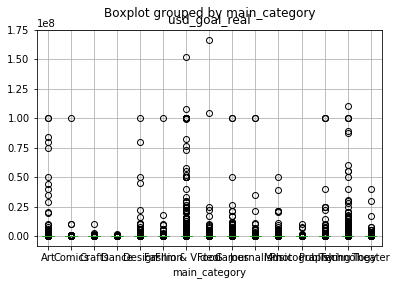

In [58]:
kickstarter_2018.boxplot(column='usd_goal_real', by='main_category');

In [59]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 3 * kickstarter_2018.usd_goal_real.std())]

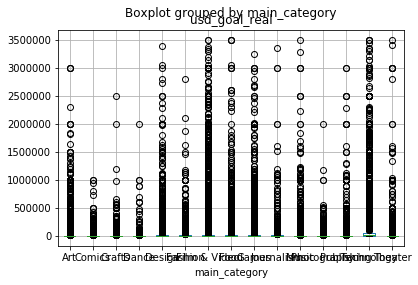

In [60]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real', by='main_category');